In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple">线性无关的定义

如果所有的 $c$ 都是零，那么向量集合 $\{v_1, v_2,...,v_p\}$ 被称为**线性无关**，如果方程

$$c_{1} {v}_{1}+c_{2} {v}_{2}+\cdots+c_{p} {v}_{p}=\mathbf{0}$$

成立。

如果任何 $c_i\neq 0$，那么向量集合是线性相关的。

## <font face="gotham" color="purple"> 例 1

确定 ${v}_1, {v}_2, {v}_3$ 是否线性无关。
$$
{v}_{1}=\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]^T, 
{v}_{2}=\left[\begin{array}{l}
4 \\
5 \\
6
\end{array}\right]^T, \text { and } {v}_{3}=\left[\begin{array}{l}
2 \\
1 \\
0
\end{array}\right]^T
$$

测试线性组合的常用方法是构造增广矩阵并计算其化简形式，例如

In [2]:
A = sy.Matrix([[1,4,2,0],
               [2,5,1,0],
               [3,6,0,0]])
A.rref()

⎛⎡1  0  -2  0⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  1  1   0⎥, (0, 1)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0   0⎦        ⎠

解表明 $x_3$ 是一个自由变量，因此自然可以是非零，因为 $x_3\cdot 0 =0$，因此该集合是线性相关的。

## <font face="gotham" color="purple"> 例 2

考虑一个矩阵 $A$，确定 $A$ 的列是否线性无关。

$$
A=\left[\begin{array}{rrr}
0 & 1 & 4 \\
1 & 2 & -1 \\
5 & 8 & 0
\end{array}\right]
$$

通过增广矩阵解决系统。

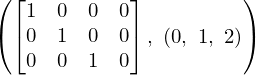

In [3]:
A = sy.Matrix([[0,1,4,0],[1,2,-1,0],[5,8,0,0]])
A.rref()

$Ax=0$ 只有平凡解，即 $(c_1, c_2, c_3)^T = (0, 0, 0)$，因此矩阵 $A$ 的列是线性无关的。

线性无关性与线性组合密切相关，在下一节中我们将可视化线性无关性。

# <font face="gotham" color="purple"> 线性无关性的可视化

这是 $\mathbb{R}^2$ 中的一个视觉示例，显示 $(3, 2)^T$, $(-9, -6)^T$, $(6, 4)^T$ 是线性相关的。

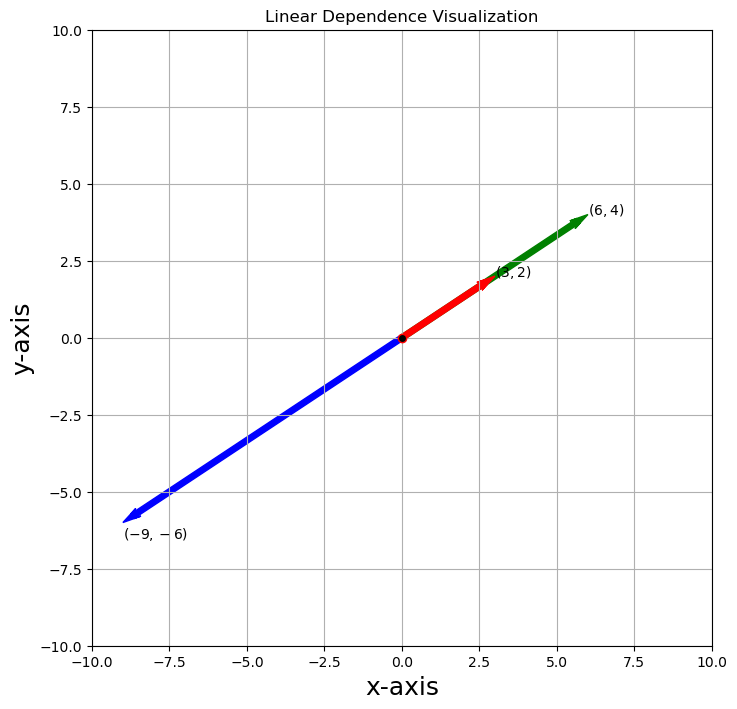

In [3]:
fig, ax = plt.subplots(figsize = (8, 8))
#######################Arrows#######################
arrows = np.array([[[0,0,3,2]],
                   [[0,0,-9,-6]], 
                   [[0,0,6,4]]])
colors = ['r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .18, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

ax.scatter(0, 0, ec = 'red', fc = 'black', zorder = 5)
ax.text(6, 4, '$(6, 4)$')
ax.text(-9, -6.5, '$(-9, -6)$')
ax.text(3, 2, '$(3, 2)$')

ax.grid(True)
ax.set_title('Linear Dependence Visualization')
ax.axis([-10, 10, -10, 10])
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
plt.show()

简单来说，_如果一个向量是另一个向量的标量倍数，例如 $3u = v$，那么这两个向量是线性相关的_。

接下来，我们使用 $\mathbb{R}^3$ 中的向量 $(1,-2,1)^T$, $(2,1,2)^T$, $(-1,2,3)^T$ 来可视化线性无关性。

标准步骤是写出前两个向量的张成空间，即一个平面。然后我们检查第三个向量是否在这个平面上。如果不在，则这组向量是线性无关的。

$$
\left[
\begin{matrix}
x\\
y\\
z
\end{matrix}
\right]=
s\left[
\begin{matrix}
1\\
-2\\
1
\end{matrix}
\right]+
t\left[
\begin{matrix}
2\\
1\\
2
\end{matrix}
\right]=
\left[
\begin{matrix}
s+2t\\
-2s+t\\
s+2t
\end{matrix}
\right]
$$

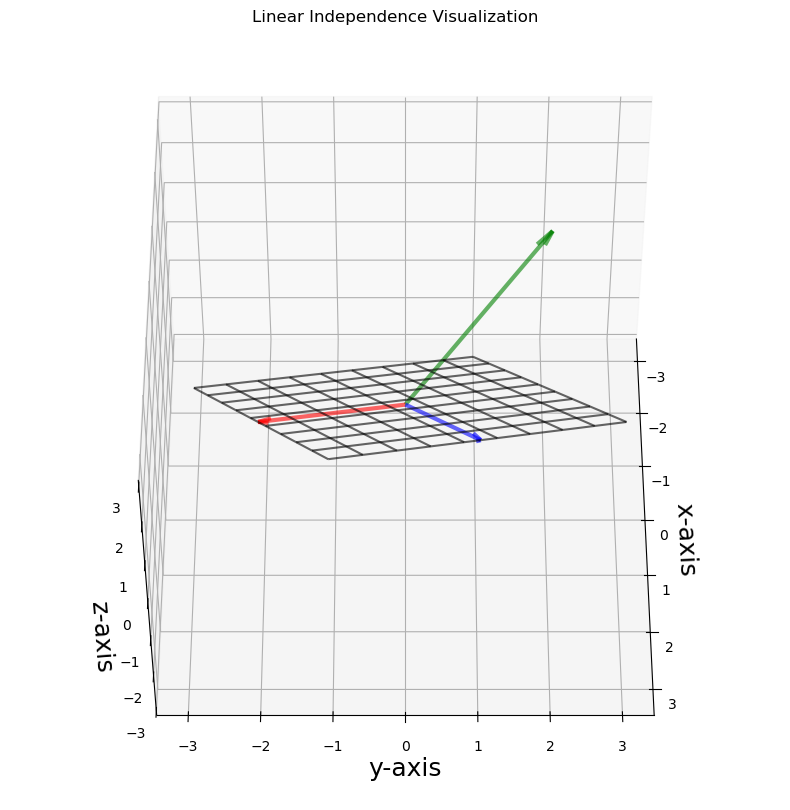

In [4]:
# `%matplotlib notebook`，只有在您使用 Jupyter Notebook 时才能使用此命令，它在 Jupyterlab 中不起作用。
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S+2*T
Y = -2*S+T
Z = S+2*T
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)

vec = np.array([[[0, 0, 0, 1, -2, 1]],
               [[0, 0, 0, 2, 1, 2]],
               [[0, 0, 0, -1, 2, 3]]])
colors = ['r','b','g']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

ax.set_title('Linear Independence Visualization')

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=50., azim=0)
plt.show()

在图像周围移动（通过设置 ```ax.view_init``` 或使用 JupyterLab 小部件），我们可以看到 <font face="gotham" color="green">绿色</font> 向量不在由 <font face="gotham" color="red">红色</font> 和 <font face="gotham" color="blue">蓝色</font> 向量张成的平面内，因此它们线性无关。

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>关于线性无关性的一则旁注</b><br><br>
设 $S = \{{v}_1,{v}_2,{v}_3, ..., {v}_n\}$ 是 $\mathbb{R}^m$ 中的一组向量，如果 $n>m$，那么 $S$ 总是线性相关的。简单的例子是 $\mathbb{R}^3$ 中的 $4$ 个向量，即使其中 $3$ 个是线性无关的，第 $4$ 个也永远不可能与它们线性无关。<br><br>

另外，如果 $S = \{{v}_1,{v}_2,{v}_3, ..., {v}_n\}$ 包含零向量，则该集合总是线性相关的。
</div>